In [1]:
# Load the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.preprocessing import image as keras_image
from scikeras.wrappers import KerasClassifier

2024-01-31 11:19:43.906152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
list1 = ['tomato/','corn/','Apple/','Grape']
for i in list1:
    
    data_dir = i
    
    class_folders = os.listdir(data_dir)
    image_paths = []
    labels = []
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)
        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            image_paths.append(image_path)
            labels.append(class_folder)
    
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
    df['num_label'] = df['label'].map(class_labels_dict)
    print(class_labels_dict)

{'Tomato Bacterial spot': 0, 'Tomato Early blight': 1, 'Tomato Late blight': 2, 'Tomato Leaf Mold': 3, 'Tomato Spider mites Two-spotted spider mite': 4, 'Tomato Target Spot': 5, 'Tomato Tomato Yellow Leaf Curl Virus': 6, 'Tomato Tomato mosaic virus': 7, 'Tomato healthy': 8, 'Tomato___Septoria_leaf_spot': 9}
{'Corn (maize) Common rust': 0, 'Corn (maize) healthy': 1, 'Corn_(maize) Cercospora leaf spot Gray leaf spot': 2, 'Corn_(maize) Northern Leaf Blight': 3}
{'Apple Apple scab': 0, 'Apple Black rot': 1, 'Apple Cedar apple rust': 2, 'Apple healthy': 3}
{'Grape Black rot': 0, 'Grape Esca (Black Measles)': 1, 'Grape Leaf blight (Isariopsis Leaf Spot)': 2, 'Grape healthy': 3}


In [ ]:
class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
df['num_label'] = df['label'].map(class_labels_dict)
class_labels_dict

In [ ]:
['Relu','Softmax','Tanh','Hardsigmoid','Sigmoid','Softplus','Softsign']

In [13]:
import os
import pandas as pd

main_folders = ['tomato', 'Apple', 'Grape', 'corn']
folder_counts = []

for main_folder in main_folders:
    data_dir = main_folder + '/'
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)
        folder_counts.append({'Main Folder': main_folder, 'Subfolder': class_folder, 'Image Count': len(image_files)})

# Convert the list of dictionaries to a DataFrame
df_counts = pd.DataFrame(folder_counts)

print(df_counts)


   Main Folder                                          Subfolder  Image Count
0       tomato             Tomato___Tomato_Yellow_Leaf_Curl_Virus         2605
1       tomato                                 Tomato___Leaf_Mold          952
2       tomato                        Tomato___Septoria_leaf_spot         1771
3       tomato                              Tomato___Early_blight         1000
4       tomato                       Tomato___Tomato_mosaic_virus          373
5       tomato                               Tomato___Late_blight         1909
6       tomato                               Tomato___Target_Spot         1404
7       tomato      Tomato___Spider_mites Two-spotted_spider_mite         1676
8       tomato                                   Tomato___healthy         1591
9       tomato                            Tomato___Bacterial_spot         2127
10       Apple                                 Apple___Apple_scab          630
11       Apple                                    Ap

In [14]:
df_counts.to_excel('image_counts.xlsx')

In [ ]:
df_counts

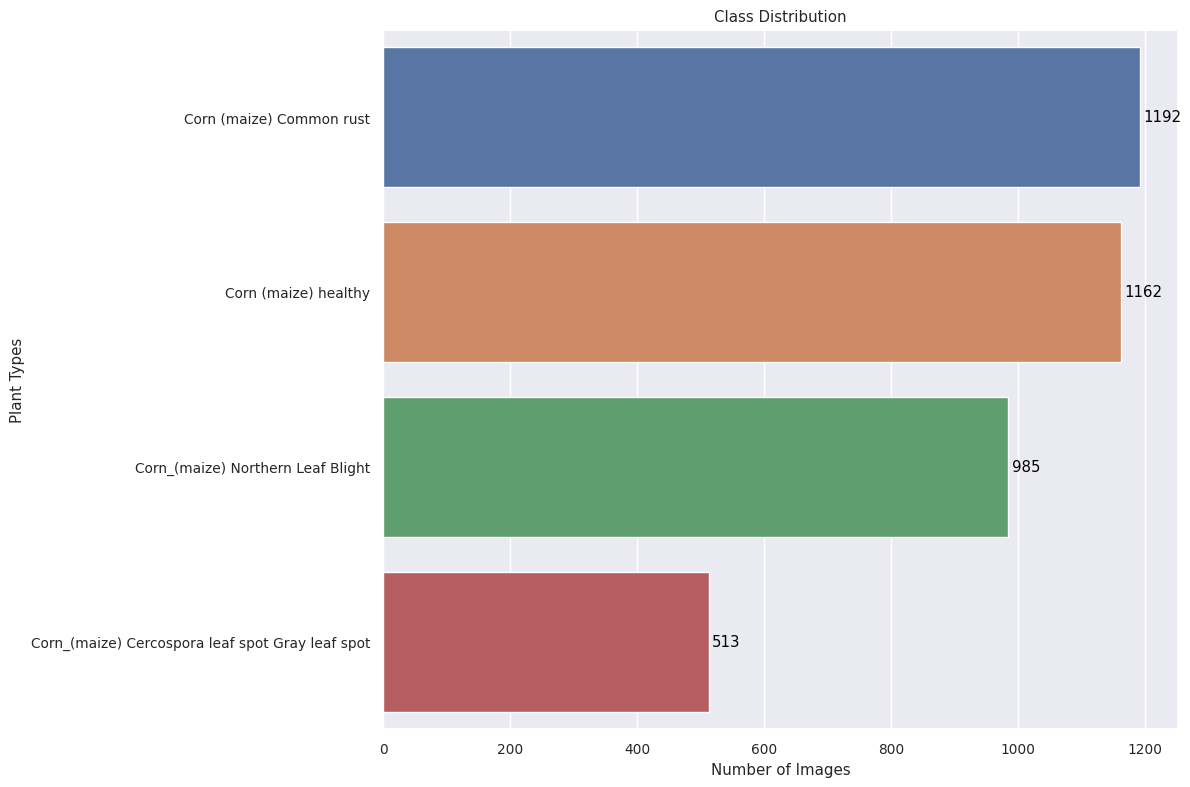

In [20]:
# Count the number of images in each class
class_counts = df['label'].value_counts()

# Visualize class distribution using a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()



In [10]:
class_counts

label
Tomato___Tomato_Yellow_Leaf_Curl_Virus           2605
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Tomato___healthy                                 1591
Tomato___Target_Spot                             1404
Tomato___Early_blight                            1000
Tomato___Leaf_Mold                                952
Tomato___Tomato_mosaic_virus                      373
Name: count, dtype: int64

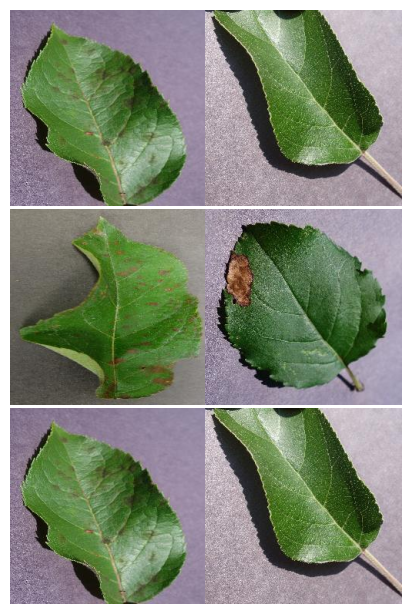

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

# Assuming df is your DataFrame
unique_labels = df['label'].unique()
num_images_to_display = 6  # Number of images you want to display
num_images_per_row = 2  # Set to 2 images per row
num_rows = num_images_to_display // num_images_per_row  # Calculate the number of rows needed

# Adjust the figure size to accommodate 2 images per row
fig_width = num_images_per_row * 2  # 6 inches width for each image
fig_height = num_rows * 2  # 6 inches height for each row
plt.figure(figsize=(fig_width, fig_height))

for i in range(num_images_to_display):
    plant_class = unique_labels[i % len(unique_labels)]
    image_path = os.path.join(df[df['label'] == plant_class]['image_path'].iloc[0])

    plt.subplot(num_rows, num_images_per_row, i + 1)
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {image_path}")
    else:
        print(f"Error: Image path does not exist: {image_path}")

# Adjust the layout with reduced padding
plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=0.2)
plt.show()


In [21]:
class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
df['num_label'] = df['label'].map(class_labels_dict)
class_labels_dict

{'Corn (maize) Common rust': 0,
 'Corn (maize) healthy': 1,
 'Corn_(maize) Cercospora leaf spot Gray leaf spot': 2,
 'Corn_(maize) Northern Leaf Blight': 3}

In [11]:
len(cluster_vectors)

1

1/1 [==============================] - 0s 181ms/step


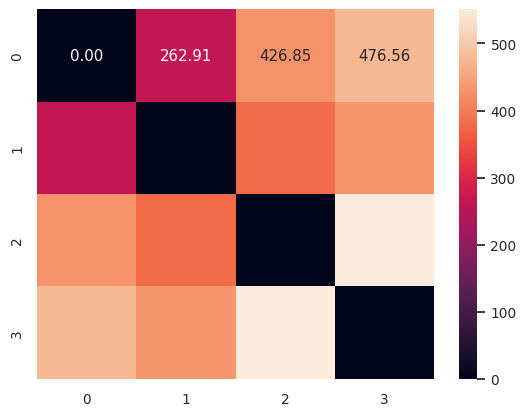

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
folders = os.listdir('Grape/')

# Initialize VGG16 model
model = VGG16(weights='imagenet', include_top=False)

def extract_features(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

def get_folder_representation(folder_path, model):
    features = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features.append(extract_features(img_path, model))
    return np.mean(features, axis=0)

# Paths to your image folders


# Extract folder representations
folder_reps = [get_folder_representation('Grape/'+folder, model) for folder in folders]

# Calculate distances or similarities
distances = np.zeros((len(folders), len(folders)))
for i in range(len(folders)):
    for j in range(len(folders)):
        distances[i, j] = np.linalg.norm(folder_reps[i] - folder_reps[j])

# Create heatmap
sns.heatmap(distances, annot=True, fmt=".2f")
plt.show()


In [45]:
folders = os.listdir('tomato/')
#folders = ['tomato/Tomato___Bacterial_spot', 'path/to/folder2', ...]

In [46]:
folders

['Tomato Leaf Mold',
 'Tomato healthy',
 'Tomato Target Spot',
 'Tomato Bacterial spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato Tomato mosaic virus',
 'Tomato Early blight',
 'Tomato Tomato Yellow Leaf Curl Virus',
 'Tomato Spider mites Two-spotted spider mite',
 'Tomato Late blight']

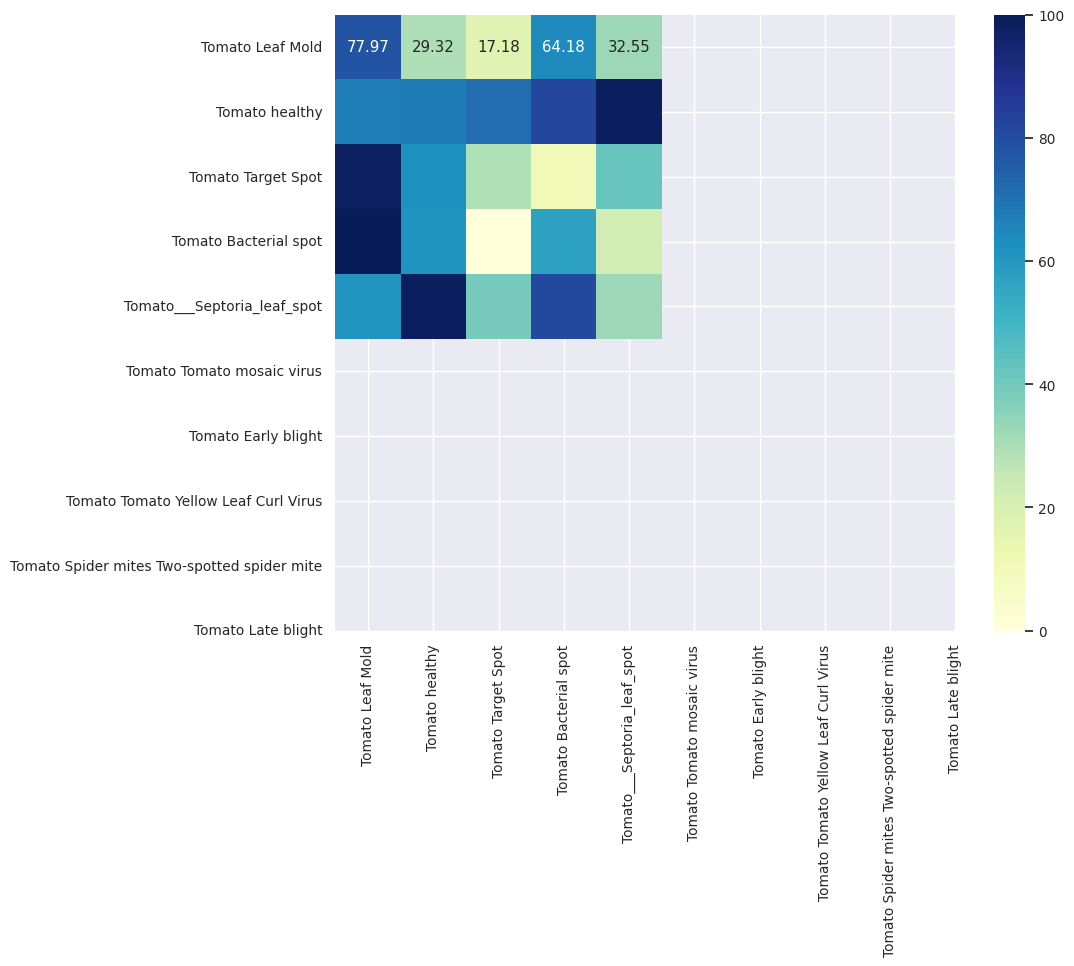

In [48]:
min_distance = np.min(distances)
max_distance = np.max(distances)
normalized_distances = 100 - ((distances - min_distance) / (max_distance - min_distance)) * 100

# Create heatmap with percentage similarity and folder names as labels
plt.figure(figsize=(10, 8)) # Adjust the size as needed
sns.set(font_scale=0.9) # Adjust the font scale as needed

sns.heatmap(normalized_distances, annot=True, fmt=".2f", cmap="YlGnBu",
            vmin=0, vmax=100, xticklabels=folders, yticklabels=folders)

# Rotate the tick labels for better visibility if needed
plt.xticks(rotation=90) # Adjust rotation angle as needed
plt.yticks(rotation=0)
plt.savefig('heatmap_tomato_similarity_names.png')
plt.show()

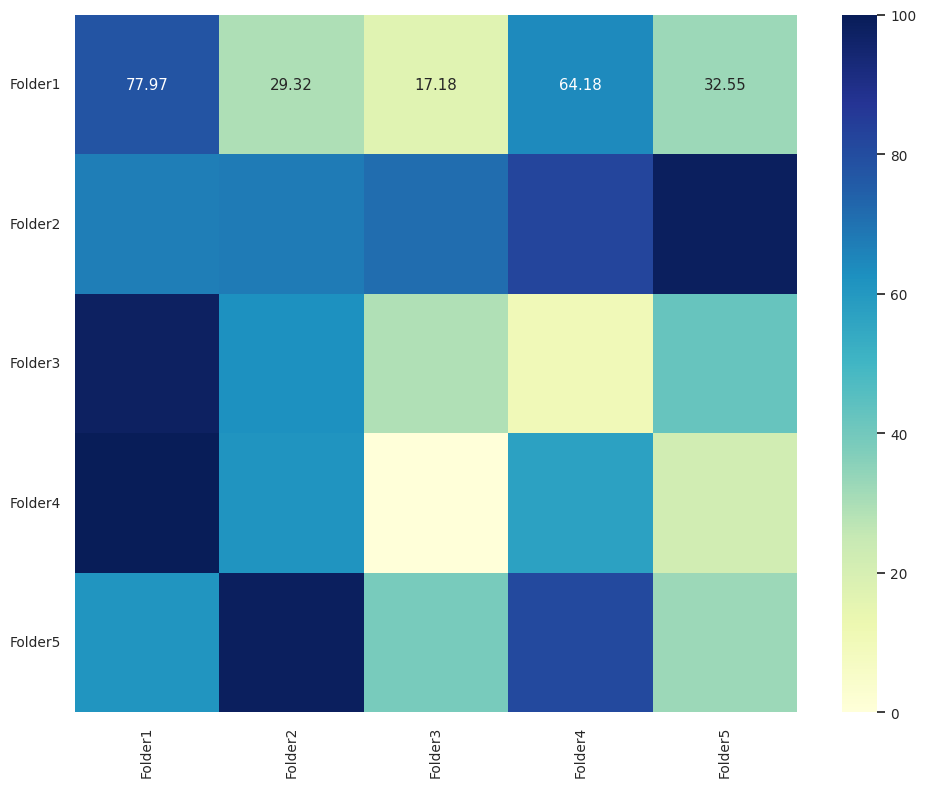

In [42]:
distances = np.random.rand(5, 5)  # Sample 5x5 matrix
folders = ["Folder1", "Folder2", "Folder3", "Folder4", "Folder5"]  # Sample folder names

# Calculations for normalization
min_distance = np.min(distances)
max_distance = np.max(distances)
normalized_distances = 100 - ((distances - min_distance) / (max_distance - min_distance)) * 100

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.set(font_scale=0.9)  # Adjust the font scale as needed

heatmap = sns.heatmap(normalized_distances, annot=True, fmt=".2f", cmap="YlGnBu",
                      vmin=0, vmax=100, xticklabels=folders, yticklabels=folders)

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)  # Adjust rotation angle as needed
plt.yticks(rotation=0)

# Ensure the heatmap is fully visible
plt.tight_layout()

In [43]:
# Since the user uploaded an image showing the problem, let's try to adjust the settings to ensure
# that the text does not get cut off in the heatmap.

# I'll assume the distances and folders are the same as the previous example.
# The user should replace these with their actual data.

# Recalculate the normalized distances in case the distances array is different
min_distance = np.min(distances)
max_distance = np.max(distances)
normalized_distances = 100 - ((distances - min_distance) / (max_distance - min_distance)) * 100

# Adjust the size of the figure to make sure no labels are cut off
plt.figure(figsize=(14, 10))  # Increased figure size
sns.set(font_scale=1.2)  # Increased font scale for better visibility

# Generate the heatmap again with adjusted settings
heatmap = sns.heatmap(normalized_distances, annot=True, fmt=".2f", cmap="YlGnBu",
                      vmin=0, vmax=100, xticklabels=folders, yticklabels=folders)

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Ensure the heatmap is fully visible and adjust the layout to prevent cutting off labels
plt.tight_layout()

# Save the new heatmap image with a different filename
heatmap_file_path = 'adjusted_heatmap_Apple_similarity_names.png'
plt.savefig(heatmap_file_path)
plt.close()  # Close the plot to prevent it from displaying in this output

heatmap_file_path


'adjusted_heatmap_Apple_similarity_names.png'

In [40]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [41]:
test_df, val_df = train_test_split(test_df, test_size=0.1, random_state=42)

In [42]:
train_df.shape, val_df.shape

((10785, 3), (463, 3))

In [43]:
train_df['num_label'] = train_df['num_label'].astype(str)
val_df['num_label'] = val_df['num_label'].astype(str)
test_df['num_label'] = test_df['num_label'].astype(str)

In [44]:
print(train_df['num_label'].unique())

['5' '1' '9' '0' '6' '3' '2' '4' '8' '7']


In [45]:
num_classes = len(class_labels_dict)

In [46]:
num_classes

10

In [47]:
batch_size = 40

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Step 4: Model Selection
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# num_classes = len(class_folders)
num_classes = len(class_labels_dict)


# Step 5: Model Building
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Step 6: Model Training
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Found 10785 validated image filenames belonging to 10 classes.
Found 463 validated image filenames belonging to 10 classes.
Found 4160 validated image filenames belonging to 10 classes.
Epoch 1/10
270/270 [==============================] - 470s 2s/step - loss: 0.4850 - accuracy: 0.8539 - val_loss: 8.9386 - val_accuracy: 0.3499
Epoch 2/10
270/270 [==============================] - 441s 2s/step - loss: 0.2249 - accuracy: 0.9321 - val_loss: 10.0388 - val_accuracy: 0.2829
Epoch 3/10
270/270 [==============================] - 442s 2s/step - loss: 0.1688 - accuracy: 0.9472 - val_loss: 19.1264 - val_accuracy: 0.0950
Epoch 4/10
270/270 [==============================] - 443s 2s/step - loss: 0.1486 - accuracy: 0.9522 - val_loss: 21.0281 - val_accuracy: 0.2700
Epoch 5/10
270/270 [==============================] - 443s 2s/step - loss: 0.1462 - accuracy: 0.9559 - val_loss: 5.3213 - val_accuracy: 0.3521
Epoch 6/10
270/270 [==============================] - 441s 2s/step - loss: 0.1251 - accuracy: 0.

In [ ]:
print(model.history.history.keys())

In [48]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

104/104 [==============================] - 32s 311ms/step - loss: 2.5840 - accuracy: 0.6495
Test Loss: 2.5840394496917725, Test Accuracy: 0.6495192050933838


In [ ]:
# Make predictions on the test set
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels for the test set
test_true_labels = test_generator.classes

# Create a DataFrame for analysis
error_df = pd.DataFrame({'True Label': test_true_labels, 'Predicted Label': test_predicted_labels})

# Misclassified images
misclassified_images = error_df[error_df['True Label'] != error_df['Predicted Label']]


In [ ]:
misclassified_images

In [ ]:
test_df.shape

In [ ]:
4473-1602

In [ ]:
# Visualization of misclassified images
plt.figure(figsize=(15, 15))
for i, row in enumerate(misclassified_images.head(9).itertuples()):
    img_path = test_df.iloc[row.Index]['image_path']
    img = keras_image.load_img(img_path, target_size=(224, 224))
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    true_label = class_folders[row._1]  # Use 'True Label' as defined in error_df
    pred_label = class_folders[row._2]  # Use 'Predicted Label' as defined in error_df
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()

In [ ]:
# Confusion Matrix and Classification Report
plt.figure(figsize=(14, 12))
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
class_names = list(class_labels_dict.keys())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

In [27]:
# Unfreeze more layers in the MobileNetV2 model
n = 40
for layer in model.layers[:-n]:
    layer.trainable = True

# Adjust the learning rate for fine-tuning
learning_rate_finetune = 0.00001

# Compile the model with the updated learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate_finetune), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tuning
epochs_finetune = 10
history_finetune = model.fit(train_generator, epochs=epochs_finetune, validation_data=val_generator)


Epoch 1/10
290/290 [==============================] - 73s 206ms/step - loss: 0.0913 - accuracy: 0.9738 - val_loss: 0.5017 - val_accuracy: 0.8795
Epoch 2/10
290/290 [==============================] - 61s 210ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.2063 - val_accuracy: 0.9498
Epoch 3/10
290/290 [==============================] - 60s 207ms/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 0.1088 - val_accuracy: 0.9699
Epoch 4/10
290/290 [==============================] - 62s 213ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0607 - val_accuracy: 0.9739
Epoch 5/10
290/290 [==============================] - 61s 211ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 0.0352 - val_accuracy: 0.9839
Epoch 6/10
290/290 [==============================] - 61s 209ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0241 - val_accuracy: 0.9900
Epoch 7/10
290/290 [==============================] - 60s 206ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0176 - val_ac

In [28]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

112/112 [==============================] - 4s 34ms/step - loss: 0.0214 - accuracy: 0.9926
Test Loss: 0.021369822323322296, Test Accuracy: 0.9926223754882812


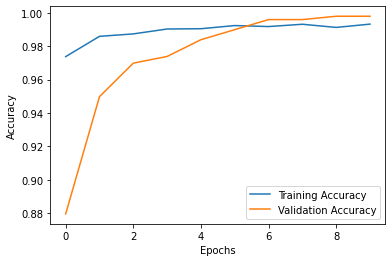

In [29]:
# Plot training and validation accuracy
plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

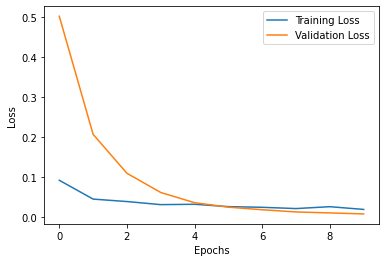

In [30]:
plt.plot(history_finetune.history['loss'], label='Training Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Save the Fine-tuned Model
model.save('fine_tuned_model.h5')

# Load the saved model
loaded_model = load_model('fine_tuned_model.h5')


In [ ]:
# Use the loaded model for making predictions on new images
new_image_path = 'plantvillage dataset/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG'
new_image = keras_image.load_img(new_image_path, target_size=(224, 224))
new_image_array = keras_image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array = new_image_array / 255.0  # Normalize the image

# Get the predicted class probabilities
predicted_probabilities = loaded_model.predict(new_image_array)[0]
predicted_class_index = np.argmax(predicted_probabilities)

# Define the class_labels_dict with class labels and corresponding indices
class_labels_dict = {
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Blueberry___healthy',
    5: 'Cherry_(including_sour)___Powdery_mildew',
    6: 'Cherry_(including_sour)___healthy',
    7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    8: 'Corn_(maize)___Common_rust_',
    9: 'Corn_(maize)___Northern_Leaf_Blight',
    10: 'Corn_(maize)___healthy',
    11: 'Grape___Black_rot',
    12: 'Grape___Esca_(Black_Measles)',
    13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    14: 'Grape___healthy',
    15: 'Orange___Haunglongbing_(Citrus_greening)',
    16: 'Peach___Bacterial_spot',
    17: 'Peach___healthy',
    18: 'Pepper,_bell___Bacterial_spot',
    19: 'Pepper,_bell___healthy',
    20: 'Potato___Early_blight',
    21: 'Potato___Late_blight',
    22: 'Potato___healthy',
    23: 'Raspberry___healthy',
    24: 'Soybean___healthy',
    25: 'Squash___Powdery_mildew',
    26: 'Strawberry___Leaf_scorch',
    27: 'Strawberry___healthy',
    28: 'Tomato___Bacterial_spot',
    29: 'Tomato___Early_blight',
    30: 'Tomato___Late_blight',
    31: 'Tomato___Leaf_Mold',
    32: 'Tomato___Septoria_leaf_spot',
    33: 'Tomato___Spider_mites Two-spotted_spider_mite',
    34: 'Tomato___Target_Spot',
    35: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    36: 'Tomato___Tomato_mosaic_virus',
    37: 'Tomato___healthy'
}

# Check if the predicted_class_index is present in the dictionary
if predicted_class_index in class_labels_dict:
    predicted_class_label = class_labels_dict[predicted_class_index]
else:
    predicted_class_label = 'Unknown Class'

# Display the image and prediction
plt.imshow(new_image)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()


In [ ]:
# Make predictions on the test set
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels for the test set
test_true_labels = test_generator.classes

# Create a DataFrame for analysis
error_df = pd.DataFrame({'True Label': test_true_labels, 'Predicted Label': test_predicted_labels})

# Misclassified images
misclassified_images = error_df[error_df['True Label'] != error_df['Predicted Label']]


In [ ]:
misclassified_images

From the above table it shows that most of time model get confused with the different disesed of the same plant so we are going to take the multiclassififcation onn the same plant with different diseased

In [ ]:
import shutil

for i in os.listdir(data_dir):
    print(i)
# # Define the source and destination paths
# source_folder = "/path/to/source_folder"
# destination_folder = "/path/to/destination_folder"

# # Use shutil.copytree to copy the entire folder and its contents
# shutil.copytree(source_folder, destination_folder)


In [ ]:
# for i in os.listdir(data_dir):
#     if 'Tomato' in i:
#         source_folder = os.path.join(data_dir,i)
#         #os.mkdir('Pepper,_bell___Bacterial_spot')
#         destination_folder = 'tomato/'
#         shutil.copytree(source_folder, destination_folder)